In [1]:
# base imports
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# make output stable across multiple runs
np.random.seed(42)

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

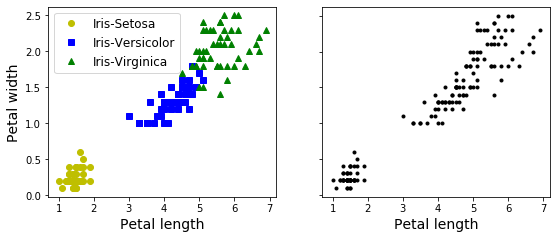

In [4]:
# classification(left) vs clustering(right)
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], 'yo', label='Iris-Setosa')
plt.plot(X[y==1, 2], X[y==1, 3], 'bs', label='Iris-Versicolor')
plt.plot(X[y==2, 2], X[y==2, 3], 'g^', label='Iris-Virginica')
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c='k', marker='.')
plt.xlabel('Petal length', fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

In [5]:
# gaussian mixture model can separate the clusters well
from sklearn.mixture import GaussianMixture

In [6]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

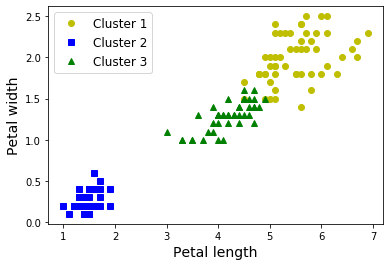

In [7]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], 'yo', label='Cluster 1')
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], 'bs', label='Cluster 2')
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], 'g^', label='Cluster 3')
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='upper left', fontsize=12)

plt.show()

In [8]:
np.sum(y_pred==y)

0

In [9]:
np.sum(y_pred==y) / len(y_pred)

0.0

In [10]:
# K-means
# generate blobs
from sklearn.datasets import make_blobs

In [11]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [12]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, 
                  cluster_std=blob_std, random_state=7)

In [13]:
# plot blobs
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14, rotation=0)

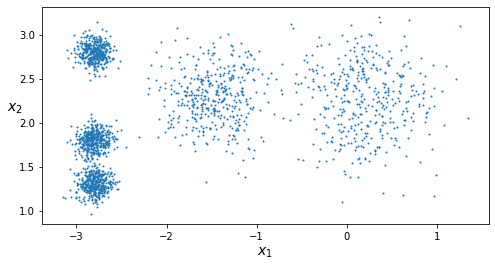

In [14]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

plt.show()

In [15]:
# train K-means clusterer on dataset
# find each blob's center and assign each instance to the closest blob
from sklearn.cluster import KMeans

In [16]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [17]:
# each instance assigned to one of 5 clusters
y_pred

array([4, 1, 0, ..., 3, 0, 1])

In [18]:
# label is the index of the cluster that the instance gets assigned to
y_pred is kmeans.labels_

True

In [19]:
# following 5 centroids(cluster centers) were estimated
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [20]:
# KMeans instance preserves the labels of the instances it was trained on
# in this context the label of the instance is the index of the cluster
# that the instance gets assigned to
kmeans.labels_

array([4, 1, 0, ..., 3, 0, 1])

In [21]:
# can also predict the labels of the new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3])

In [22]:
# plot model decision boundaries
# Voronoi diagram
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', 
                s=30, linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x',
                s=50, linewidths=50, color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap='Pastel2')
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    
    if show_xlabels:
        plt.xlabel('$x_1$', fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel('$x_2$', fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

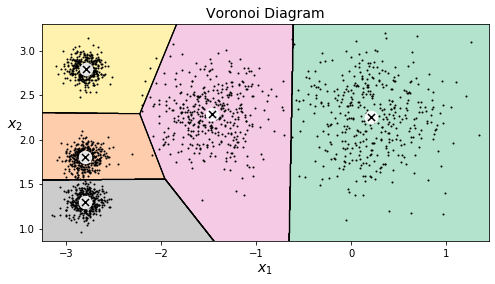

In [23]:
plt.figure(figsize=(8, 4))
plt.title('Voronoi Diagram', fontsize=14)
plot_decision_boundaries(kmeans, X)

plt.show()
# some instances near edges probably assigned to wrong cluster
# but overall good

In [24]:
# hard clustering vs soft clustering
# instead of arbitrarily choosing closest cluster for each instance (hard clustering)
# might be better to measure distance of each instance to all 5 centroids
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

In [25]:
# can verify the Euclidean distance
np.linalg.norm(np.tile(X_new, 
                (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

In [26]:
# K-Means Algorithm
# initialize k centroids randomly: k distinct instances chosen randomly from dataset
# centroids placed at their locations
# repeat until convergence(centroids stop moving):
# assign each instance to the closest centroid
# update centroids to be the mean of the instances that are assigned to them
kmeans_iter1 = KMeans(n_clusters=5, init='random', n_init=1, algorithm='full',
                      max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init='random', n_init=1, algorithm='full',
                      max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init='random', n_init=1, algorithm='full',
                      max_iter=3, random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)
# KMeans applies optimized algorithm by default
# set init='random', n_init=1, and algorithm='full' to get original KMeans algorithm

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

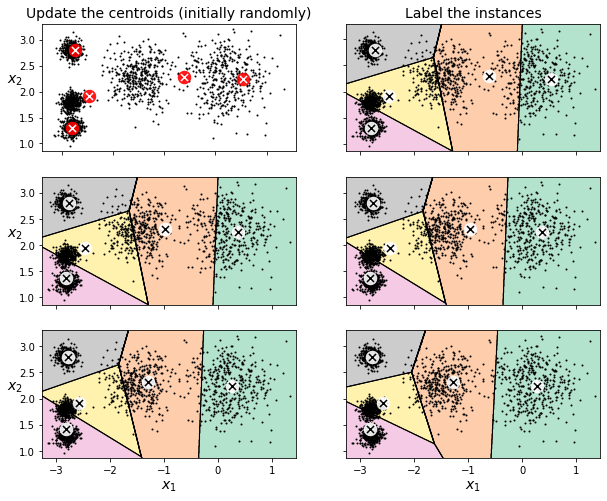

In [27]:
# plot
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel('$x_2$', fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title('Update the centroids (initially randomly)', fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title('Label the instances', fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [28]:
# K-Means Variability
# problem with the above approach: if K-Means is run mulitple times
# (or with different random seeds) it can converge to very different solutions
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    
    plt.figure(figsize=(10, 3.2))
    
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)
        
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

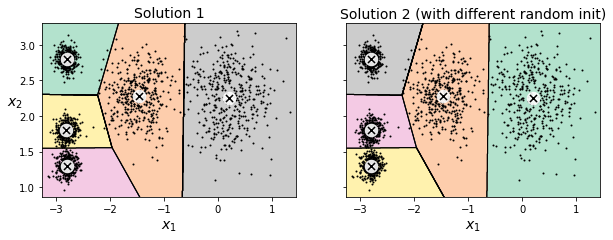

In [29]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init='random', n_init=1,
                          algorithm='full', random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init='random', n_init=1,
                          algorithm='full', random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          'Solution 1', 'Solution 2 (with different random init)')

plt.show()

In [30]:
# inertia
# also a property of matter
kmeans.inertia_

211.5985372581684

In [31]:
# inertia is the sum of the squared distances between each training instance
# and its closest centroid
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

In [32]:
# score() method returns the negative inertia
# because a predictor's score() method must always respect the
# 'great is better' rule
kmeans.score(X)

-211.59853725816856

In [33]:
# one way to solve variability issue is to run K-Means multiple times
# with different random initializations and select
# whatever minimizes the inertia
kmeans_rnd_init1.inertia_

211.59853725816822

In [34]:
kmeans_rnd_init2.inertia_

211.59853725816822

In [35]:
# n_init hyperparameter determines how many times the original algorithm runs
# and selects the solution that minimizes the inertia
kmeans_rnd_10_inits = KMeans(n_clusters=5, init='random', n_init=10,
                             algorithm='full', random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=11,
       tol=0.0001, verbose=0)

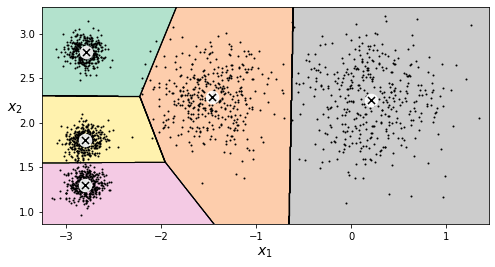

In [36]:
# results in initial model, which is the optimal K-Means solution
# (in terms of inertia, assuming k=5)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)

plt.show()

In [37]:
# instead of initializing the centroids entirely randomly
# preferable to initialize them using K-Means++ algorithm
# set init='k-means++', this should be the default
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

In [39]:
# accelerated K-Means
# K-Means can be sped up by avoiding unnecessary distance calculations
# done by using the triangle inequality (given 3 points A, B, C)
# distance AC such that AC <= AB + BC
# elkan's variant of K-Means
# does not support sparse data
# 'elkan' used for dense data by default, and 'full' for sparse data
%timeit -n 50 KMeans(algorithm='elkan').fit(X)

73.4 ms ± 2.62 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [40]:
%timeit -n 50 KMeans(algorithm='full').fit(X)

98.6 ms ± 900 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [41]:
# Mini-Batch K-Means
from sklearn.cluster import MiniBatchKMeans

In [42]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [43]:
minibatch_kmeans.inertia_

211.93186531476775

In [44]:
# if dataset doesn't fit in memory, use memmap class
# filename='my_mnist.data'
# m, n = 50000, 28*28
# X_mm = np.memmap(filename, dtype='float32', mode='readonly', shape=(m, n))

In [45]:
# minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
# minibatch_kmeans.fit(X)

In [46]:
# if data size exceeds memmap's capabilities
# start with function to load next batch
# IRL you'd load data from disk
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [47]:
# train model by feeding it one batch at a time 
# implement multiple initializations and keep model with lowest inertia
np.random.seed(42)

In [48]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500 # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)
    
    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_
            
    if(best_kmeans is None or minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [49]:
best_kmeans.score(X)

-211.70999744411483

In [50]:
# Mini-batch K-Means is faster than regular K-Means
%timeit KMeans(n_clusters=5).fit(X)

42 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [51]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

25.3 ms ± 2.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [52]:
# faster but performance is often lower (higher inertia)
# also degrades as k increases
# plot inertia ratio and training time ratio
from timeit import timeit

In [53]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print(f'\r{k}/{100}', end='')
    times[k-1, 0] = timeit('kmeans.fit(X)', number=10, globals=globals())
    times[k-1, 1] = timeit('minibatch_kmeans.fit(X)', number=10, globals=globals())
    inertias[k-1, 0] = kmeans.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

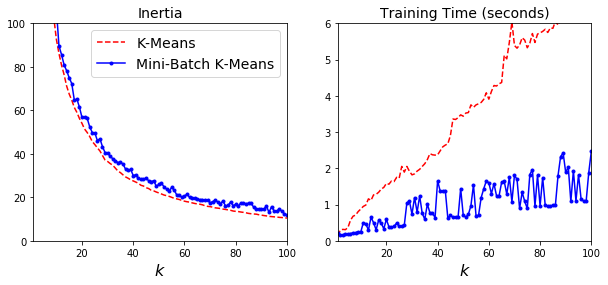

In [54]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], 'r--', label='K-Means')
plt.plot(range(1, 101), inertias[:, 1], 'b.-', label='Mini-Batch K-Means')
plt.xlabel('$k$', fontsize=16)
plt.title('Inertia', fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], 'r--', label='K-Means')
plt.plot(range(1, 101), times[:, 1], 'b.-', label='Mini-Batch K-Means')
plt.xlabel('$k$', fontsize=16)
plt.title('Training Time (seconds)', fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

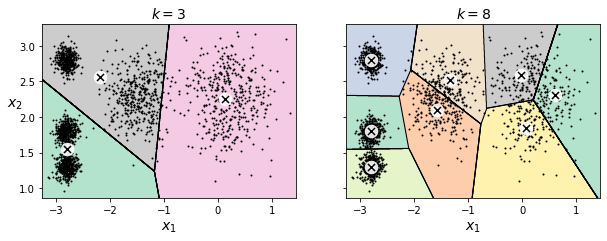

In [55]:
# optimal number of clusters
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, '$k=3$', '$k=8$')

plt.show()

In [56]:
kmeans_k3.inertia_

653.2167190021553

In [57]:
kmeans_k8.inertia_

118.41983763508077

In [58]:
# the inertia gets lower the higher k gets
# makes sense since the more clusters the closer each instance is to a centroid
# plot inertia as a function of k and analyze resulting curve
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

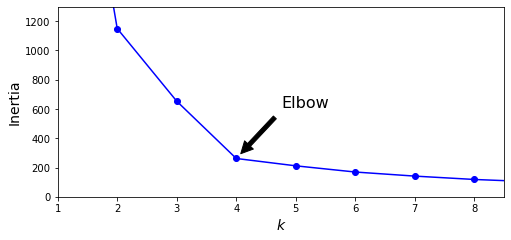

In [59]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]), 
             xytext=(0.55, 0.55),
             textcoords='figure fraction', 
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([1, 8.5, 0, 1300])

plt.show()

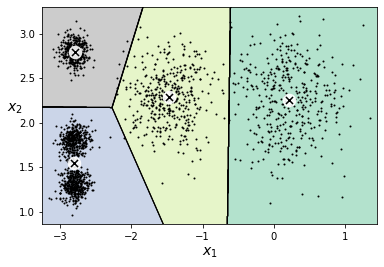

In [60]:
# elbow at k=4, meaning less clusters would be bad and
# more would not help much and may cut clusters in half
# k=4 is a good choice but not perfect since the blobs in lower left
# would be considered as a single cluster, but overall not bad
plot_decision_boundaries(kmeans_per_k[4-1], X)

plt.show()

In [61]:
# silhouette score (silhouette coefficient over all instances)
# equal to (b-a)/max(a,b)
# a is mean distance to other instances in same cluster
# b is mean nearest-cluster distance, mean distance to instances of closest cluster
# coefficient varies from -1 and +1
# close to +1: instance is well inside is own cluster and far from others
# close to 0: close to a cluster boundary
# close to -1: instance may have been assigned to the wrong cluster
from sklearn.metrics import silhouette_score as sil_score

In [62]:
sil_score(X, kmeans.labels_)

0.33772899139511137

In [63]:
sil_scores = [sil_score(X, model.labels_) for model in kmeans_per_k[1:]]

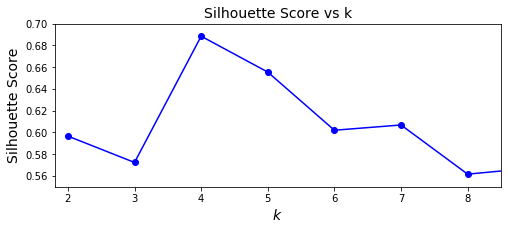

In [64]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), sil_scores, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.title('Silhouette Score vs k', fontsize=14)

plt.show()
# better visualization that previously
# confirms that k=4 is a good choice, but also that k=5 is good as well

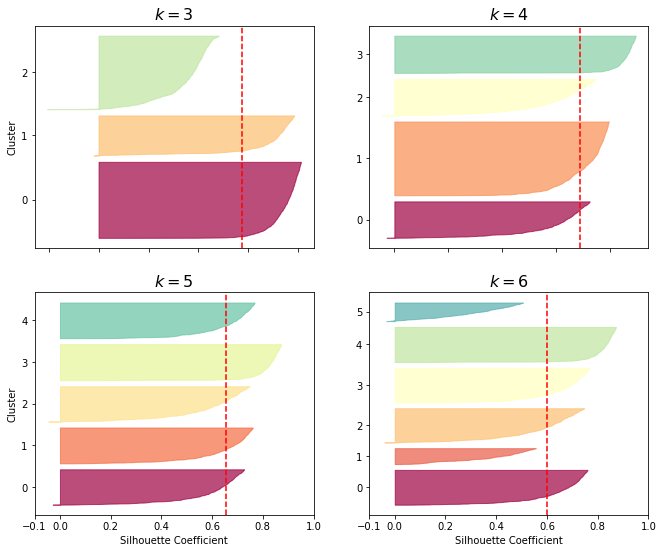

In [65]:
# Silhouette Diagram
# plot every instance's silhouette coefficient
# sorted by the cluster they are assigned to and
# by the value of the coefficient
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    sil_coefficients = silhouette_samples(X, y_pred)
    
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = sil_coefficients[y_pred == i]
        coeffs.sort()
        
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel('Cluster')
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel('Silhouette Coefficient')
    else:
        plt.tick_params(labelbottom=False)
        
    plt.axvline(x=sil_scores[k - 2], color='red', linestyle='--')
    plt.title(f'$k={k}$', fontsize=16)
    
plt.show()

In [66]:
# k-means limits
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

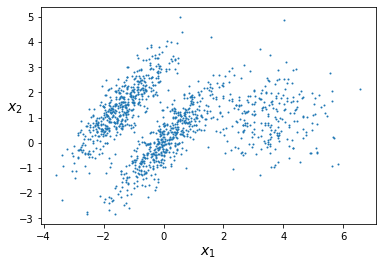

In [67]:
plot_clusters(X)

In [68]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                    n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

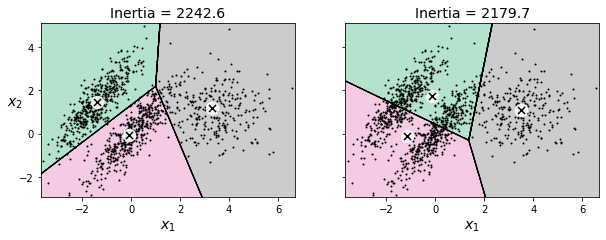

In [69]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title('Inertia = {:.1f}'.format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title('Inertia = {:.1f}'.format(kmeans_bad.inertia_), fontsize=14)

plt.show()

In [70]:
# clustering for image segmentation
from matplotlib.image import imread
image = imread(os.path.join('images', 'unsupervised_learning', 'ladybug.png'))

FileNotFoundError: [Errno 2] No such file or directory: 'images\\unsupervised_learning\\ladybug.png'